In [3]:
# Import packages and read in dataset
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
merged_data = pd.read_csv('/media/marianne/OS/Users/maria/Code/sp_housing/datasets/property_codes.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5439 entries, 0 to 5438
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5439 non-null   int64  
 1   Rua          5439 non-null   object 
 2   Bairro       5439 non-null   object 
 3   Cidade       5439 non-null   object 
 4   Metragem     5439 non-null   float64
 5   Quartos      5439 non-null   float64
 6   Banheiros    5439 non-null   float64
 7   Vagas        5439 non-null   float64
 8   Valor_BRL    5439 non-null   float64
 9   CEP          5439 non-null   float64
 10  Latitude     5439 non-null   float64
 11  Longitude    5439 non-null   float64
 12  Point        5439 non-null   object 
 13  setor_censo  5435 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 595.0+ KB


Filter out "junk" properties

In [43]:
# Outlier Search: huge properties
huge_properties = merged_data.sort_values("Metragem", ascending=False)
huge_properties.head(20)

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,Point,setor_censo
379,379,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000.00,5.00,9.00,6.00,7000000.00,5608020.00,-23.58,-46.71,POINT (-46.7073838 -23.5827571),355030854000008.00
4584,4584,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000.00,4.00,2.00,4.00,2900000.00,4894050.00,-23.86,-46.76,POINT (-46.7577805 -23.8596706),355030855000401.00
3919,3919,Rua Canuto Borelli,Vila Castelo,São Paulo,2850.00,3.00,3.00,10.00,4000000.00,4438070.00,-23.68,-46.67,POINT (-46.6710252 -23.6803339),355030816000264.00
4713,4713,Rua Itassuce,Pacaembu,São Paulo,2505.00,3.00,7.00,12.00,12500000.00,1234040.00,-23.97,-46.37,POINT (-46.3692932 -23.9713783),355100905000545.00
4714,4714,Rua Itassuce,Pacaembu,São Paulo,2505.00,3.00,7.00,12.00,12500000.00,1234040.00,-23.97,-46.37,POINT (-46.3692932 -23.9713783),355100905000545.00
4712,4712,Rua Itassuce,Pacaembu,São Paulo,2500.00,3.00,7.00,12.00,12500000.00,1234040.00,-23.97,-46.37,POINT (-46.3692932 -23.9713783),355100905000545.00
4469,4469,Rua Estados Unidos,Jardim América,São Paulo,1816.00,4.00,10.00,20.00,55000000.00,1427001.00,-23.57,-46.67,POINT (-46.6682211 -23.5672586),355030845000276.00
4468,4468,Rua Estados Unidos,Jardim América,São Paulo,1816.00,4.00,10.00,20.00,55000000.00,1427000.00,-23.57,-46.67,POINT (-46.6682211 -23.5672586),355030845000276.00
4470,4470,Rua Estados Unidos,Jardim América,São Paulo,1816.00,4.00,10.00,20.00,55000000.00,1427002.00,-23.57,-46.67,POINT (-46.6682211 -23.5672586),355030845000276.00
2615,2615,Rua Brigadeiro Armando Trompowsky,Jardim Morumbi,São Paulo,1705.00,7.00,7.00,6.00,12000000.00,5655050.00,-23.61,-46.72,POINT (-46.7170576 -23.6106546),355030854000057.00


In [38]:
# Config display to suppress decimal cases and scientific notation of floats
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [71]:
# Filter out defective samples
filter_area = merged_data.query("Metragem <= 3000")
filter_area.describe()

,Unnamed: 0,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,setor_censo
count,5437.00,5437.00,5437.00,5437.00,5437.00,5437.00,5437.00,5437.00,5437.00,5433.00
mean,2719.09,327.86,3.46,3.82,3.85,2872186.62,4111908.54,-23.54,-46.72,354892933145608.31
std,1570.01,231.82,1.09,1.83,3.04,3797467.95,1419029.49,0.32,0.46,688219137485.06
min,0.00,10.00,1.00,1.00,1.00,13000.00,1130010.00,-24.67,-51.96,350010505000003.00
25%,1360.00,169.00,3.00,2.00,2.00,1000000.00,4016033.00,-23.61,-46.70,355030822000266.00
50%,2719.00,271.00,3.00,4.00,3.00,1900000.00,4517140.00,-23.59,-46.67,355030848000075.00
75%,4078.00,405.00,4.00,5.00,5.00,3150000.00,5088060.00,-23.55,-46.64,355030870000210.00
max,5438.00,2850.00,11.00,14.00,50.00,65000000.00,8473440.00,-14.24,-44.04,355410205000664.00


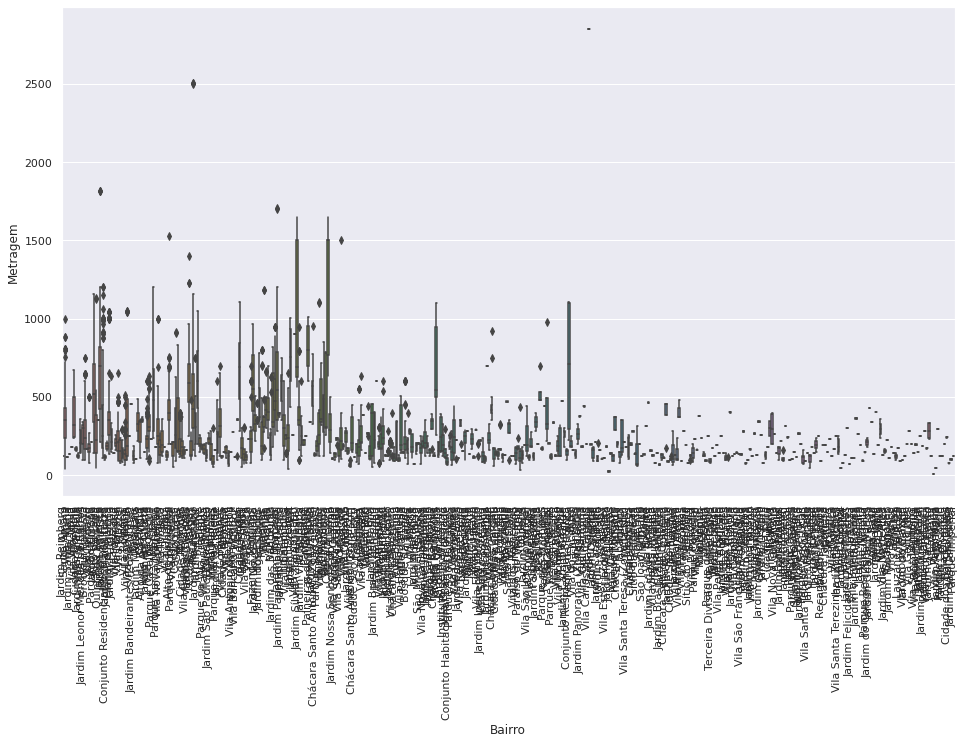

In [72]:
# Box-plot floorsize areas
plt.figure(figsize=(16,9))
ax = sns.boxplot(x="Bairro", y="Metragem", data=filter_area)
ax.tick_params(axis='x', rotation=90)
plt.show()

In [73]:
# Filter out defective samples
filter_area = merged_data.query("Metragem <= 2000")
filter_area.describe()

,Unnamed: 0,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,setor_censo
count,5433.00,5433.00,5433.00,5433.00,5433.00,5433.00,5433.00,5433.00,5433.00,5429.00
mean,2717.77,326.20,3.46,3.81,3.85,2866662.74,4113437.61,-23.54,-46.72,354892792825398.44
std,1569.81,223.59,1.09,1.83,3.04,3792086.97,1417932.12,0.32,0.46,688452752653.26
min,0.00,10.00,1.00,1.00,1.00,13000.00,1130010.00,-24.67,-51.96,350010505000003.00
25%,1359.00,169.00,3.00,2.00,2.00,1000000.00,4016035.00,-23.61,-46.70,355030822000266.00
50%,2717.00,270.00,3.00,4.00,3.00,1900000.00,4517140.00,-23.59,-46.67,355030848000073.00
75%,4076.00,405.00,4.00,5.00,5.00,3150000.00,5089020.00,-23.55,-46.64,355030870000161.00
max,5438.00,1816.00,11.00,14.00,50.00,65000000.00,8473440.00,-14.24,-44.04,355410205000664.00


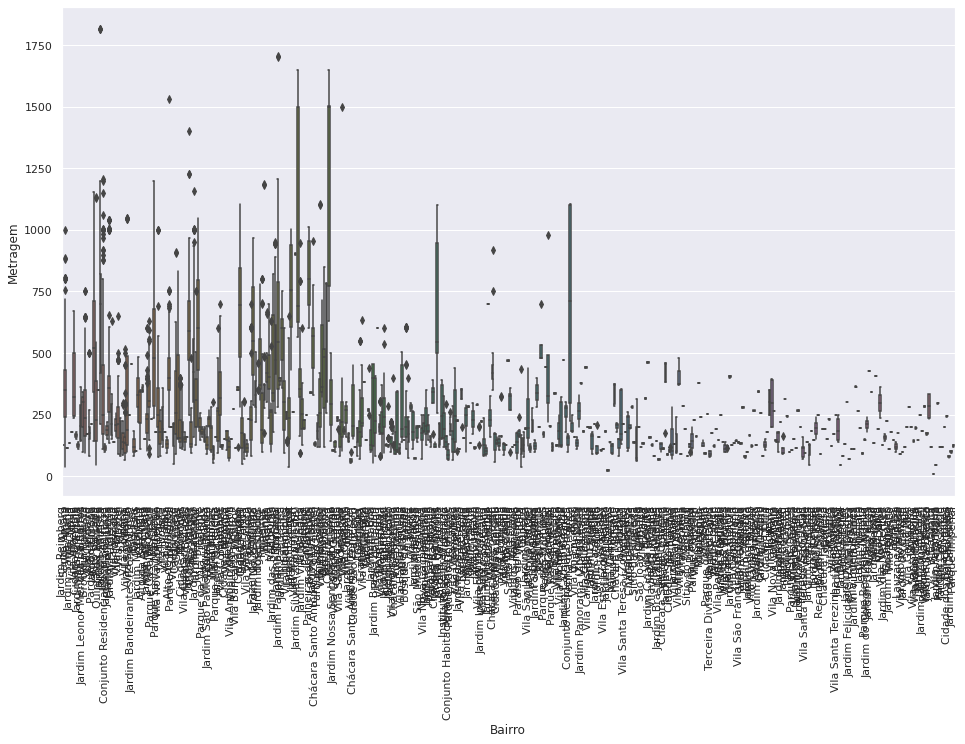

In [74]:
# Box-plot floorsize areas
plt.figure(figsize=(16,9))
ax = sns.boxplot(x="Bairro", y="Metragem", data=filter_area)
ax.tick_params(axis='x', rotation=90)
plt.show()

In [48]:
# Outlier Search: tiny properties
tiny_properties = filter_area.sort_values("Metragem", ascending=True)
tiny_properties.head(20)

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,Point,setor_censo
5348,5348,Rua Pestana,Vila Guaca,São Paulo,10.00,3.00,2.00,2.00,800000.00,2433070.00,-23.54,-46.80,POINT (-46.802283 -23.5380917),353440105001765.00
3997,3997,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,20.00,3.00,2.00,2.00,800000.00,5713520.00,-23.63,-46.73,POINT (-46.7297799 -23.6277585),355030883000262.00
3999,3999,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25.00,3.00,2.00,2.00,800000.00,5713520.00,-23.63,-46.73,POINT (-46.7297799 -23.6277585),355030883000262.00
3998,3998,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25.00,3.00,2.00,2.00,800000.00,5713520.00,-23.63,-46.73,POINT (-46.7297799 -23.6277585),355030883000262.00
4705,4705,Rua Ipomeias,Vila Bela,São Paulo,36.00,2.00,1.00,1.00,196000.00,3201050.00,-23.60,-46.57,POINT (-46.5733783 -23.5990493),355030893000051.00
2616,2616,Rua Bela Vista,Santo Amaro,São Paulo,37.00,5.00,5.00,2.00,690000.00,4709000.00,-23.63,-46.69,POINT (-46.6921169 -23.6333885),355030871000263.00
4779,4779,Rua Sacadura Cabral,Lapa,São Paulo,37.00,1.00,2.00,1.00,510000.00,5076020.00,-23.52,-46.71,POINT (-46.7102663 -23.5212257),355030848000058.00
2617,2617,Rua Bela Vista,Santo Amaro,São Paulo,37.00,5.00,5.00,2.00,690000.00,4709001.00,-23.56,-46.65,POINT (-46.6463975 -23.5570827),355030807000013.00
4780,4780,Rua Sacadura Cabral,Lapa,São Paulo,42.00,1.00,2.00,1.00,510000.00,5076020.00,-23.52,-46.71,POINT (-46.7102663 -23.5212257),355030848000058.00
4781,4781,Rua Sacadura Cabral,Lapa,São Paulo,42.00,1.00,2.00,1.00,510000.00,5076020.00,-23.52,-46.71,POINT (-46.7102663 -23.5212257),355030848000058.00


In [49]:
filter_area = filter_area.drop(5348)
filter_area.describe()

,Unnamed: 0,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,setor_censo
count,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5432.00,5428.00
mean,2717.28,326.25,3.46,3.81,3.85,2867043.20,4113746.95,-23.54,-46.72,354893060453958.44
std,1569.55,223.57,1.09,1.83,3.04,3792332.36,1417879.29,0.32,0.46,688233683886.67
min,0.00,20.00,1.00,1.00,1.00,13000.00,1130010.00,-24.67,-51.96,350010505000003.00
25%,1358.75,169.00,3.00,2.00,2.00,1000000.00,4016796.25,-23.61,-46.70,355030822000266.75
50%,2716.50,270.50,3.00,4.00,3.00,1900000.00,4517140.00,-23.59,-46.67,355030848000074.00
75%,4075.25,405.00,4.00,5.00,5.00,3150000.00,5089025.00,-23.55,-46.64,355030870000161.00
max,5438.00,1816.00,11.00,14.00,50.00,65000000.00,8473440.00,-14.24,-44.04,355410205000664.00


<Figure size 1152x648 with 0 Axes>

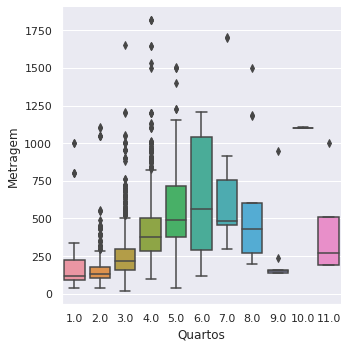

In [60]:
plt.figure(figsize=(16,9))
ax = sns.catplot(x="Quartos", y="Metragem", data=filter_area, kind="box")
plt.show()

In [75]:
# Filter out defective samples
filter_area = merged_data.query("Metragem <= 1250")
filter_area.describe()

,Unnamed: 0,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,setor_censo
count,5418.00,5418.00,5418.00,5418.00,5418.00,5418.00,5418.00,5418.00,5418.00,5414.00
mean,2716.20,322.63,3.45,3.80,3.83,2815743.57,4112857.50,-23.54,-46.72,354893228660894.88
std,1570.23,213.23,1.09,1.82,3.01,3548145.91,1416783.62,0.32,0.46,687441942406.43
min,0.00,10.00,1.00,1.00,1.00,13000.00,1130010.00,-24.67,-51.96,350010505000003.00
25%,1356.25,168.00,3.00,2.00,2.00,999250.00,4016288.75,-23.61,-46.70,355030822000266.25
50%,2714.50,270.00,3.00,4.00,3.00,1900000.00,4517140.00,-23.59,-46.67,355030848000073.00
75%,4073.75,405.00,4.00,5.00,5.00,3150000.00,5086765.00,-23.55,-46.64,355030870000231.75
max,5438.00,1225.00,11.00,14.00,50.00,65000000.00,8473440.00,-14.24,-44.04,355410205000664.00


<Figure size 1152x648 with 0 Axes>

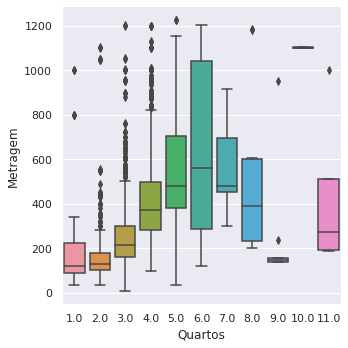

In [76]:
plt.figure(figsize=(16,9))
ax = sns.catplot(x="Quartos", y="Metragem", data=filter_area, kind="box")
plt.show()

<Figure size 1152x648 with 0 Axes>

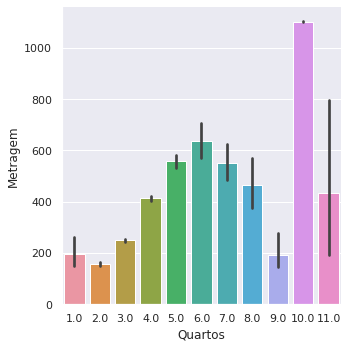

In [77]:
ax = sns.catplot(x="Quartos", y="Metragem", data=filter_area, kind="bar")
plt.show()

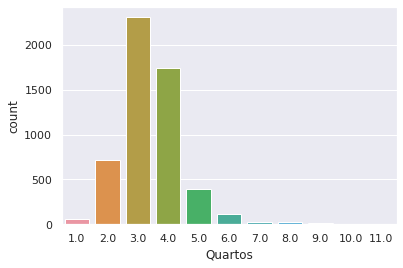

In [82]:
sns.countplot(x="Quartos", data=filter_area)
plt.show()

<Figure size 1152x648 with 0 Axes>

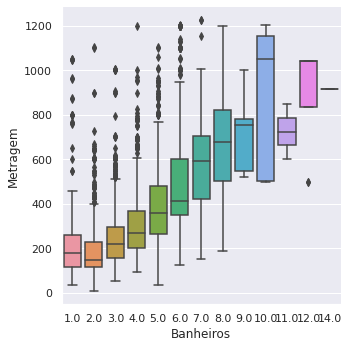

In [85]:
plt.figure(figsize=(16,9))
ax = sns.catplot(x="Banheiros", y="Metragem", data=filter_area, kind="box")
plt.show()

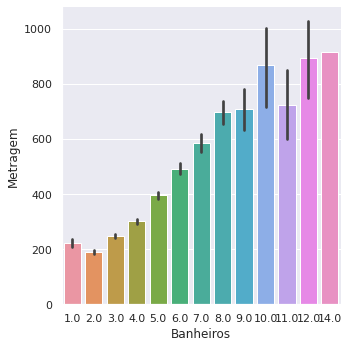

In [86]:
ax = sns.catplot(x="Banheiros", y="Metragem", data=filter_area, kind="bar")
plt.show()

In [79]:
filter_bedrooms = filter_area.query("Quartos <= 8")
filter_bedrooms.describe()

,Unnamed: 0,Metragem,Quartos,Banheiros,Vagas,Valor_BRL,CEP,Latitude,Longitude,setor_censo
count,5392.00,5392.00,5392.00,5392.00,5392.00,5392.00,5392.00,5392.00,5392.00,5388.00
mean,2710.12,322.74,3.42,3.80,3.84,2816227.68,4123089.71,-23.54,-46.72,354894463715492.81
std,1570.75,212.59,1.01,1.82,3.01,3556317.97,1410296.29,0.31,0.46,684695783821.78
min,0.00,10.00,1.00,1.00,1.00,13000.00,1130010.00,-24.67,-51.96,350010505000003.00
25%,1350.75,170.00,3.00,2.00,2.00,995000.00,4019000.00,-23.61,-46.70,355030822000235.00
50%,2703.50,270.50,3.00,4.00,3.00,1900000.00,4518060.00,-23.59,-46.67,355030848000117.00
75%,4057.25,405.00,4.00,5.00,5.00,3150000.00,5089780.00,-23.55,-46.64,355030870000260.00
max,5438.00,1225.00,8.00,14.00,50.00,65000000.00,8473440.00,-14.24,-44.04,355410205000664.00


<AxesSubplot:xlabel='Valor_BRL', ylabel='Metragem'>

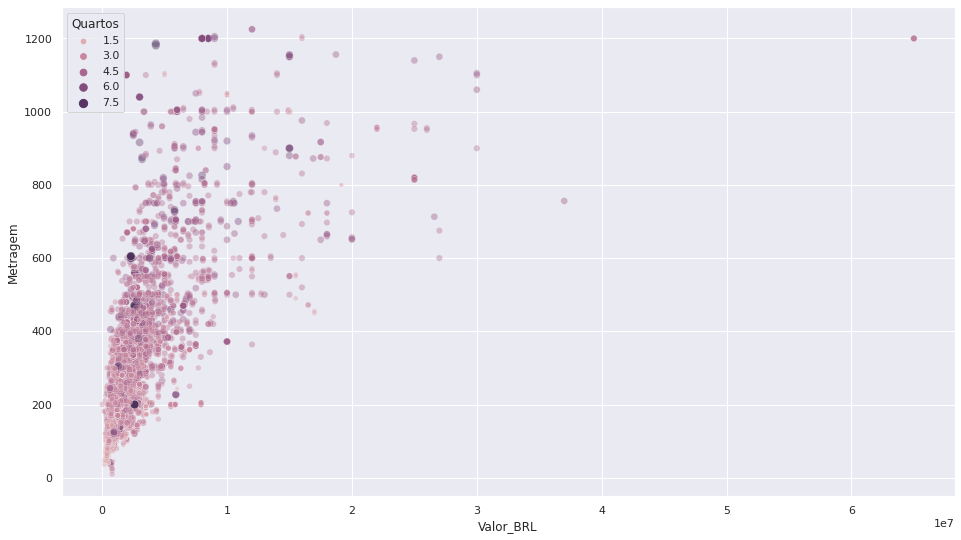

In [95]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="Valor_BRL", y="Metragem", data=filter_bedrooms, hue="Quartos", size="Quartos", hue_norm=(0, 9), alpha=0.4)

<Figure size 1152x648 with 0 Axes>

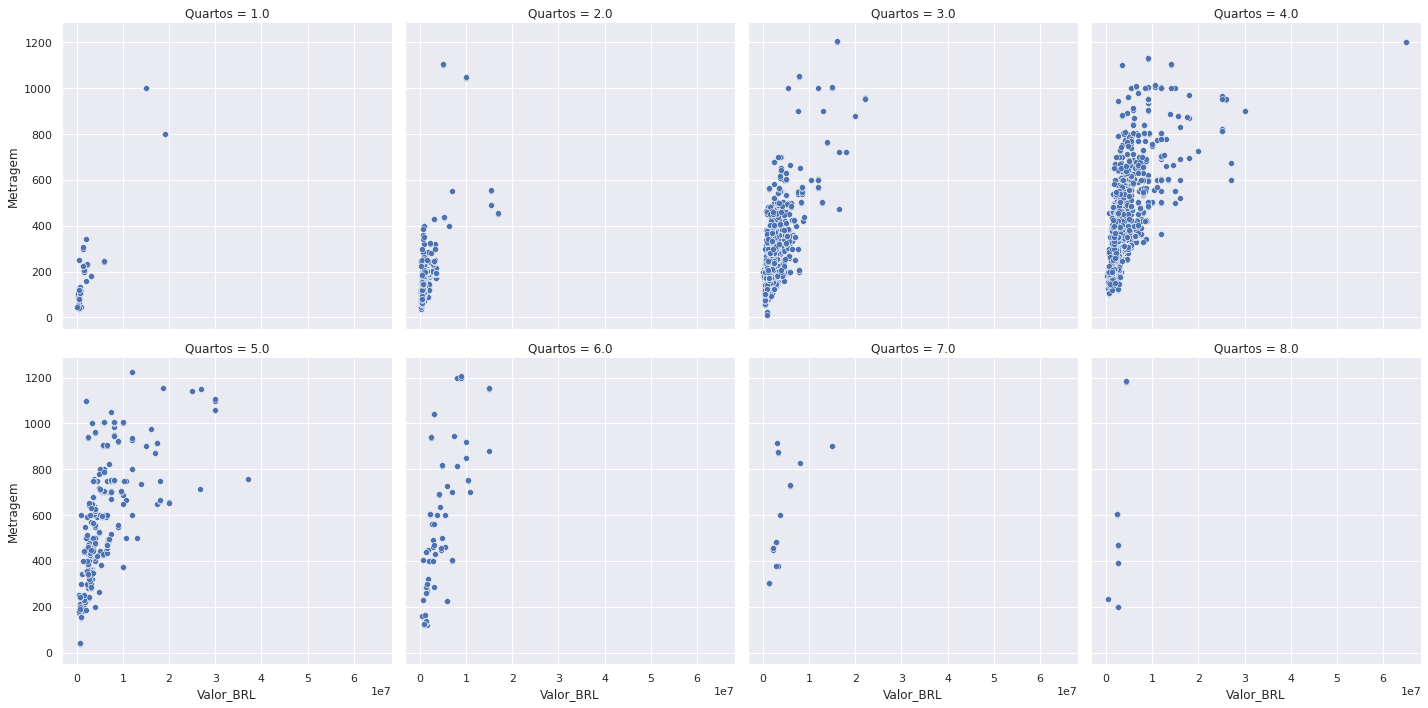

In [84]:
plt.figure(figsize=(16,9))
sns.relplot(x="Valor_BRL", y="Metragem", data=filter_bedrooms, kind="scatter", col="Quartos", col_wrap=4)